In [1]:
import numpy as np
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import fitness_mcmc
import fitness_mcmc.data_io as io
import fitness_mcmc.fitness_mcmc as m
import fitness_mcmc.format_raw as raw

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


formatting done
formatting done
formatting done
[[ 13439   1710    423    255    674      0]
 [ 12698   1767    454    265    706      0]
 [ 16799   1981    553    486   4610      0]
 [ 12833   1885    403    285    730      0]
 [ 17980   2119    550    526   4938      0]
 [ 16960   2207    607    418   1085      0]
 [ 16440   2182    512    337   1025      0]
 [ 13905   1853    472    278    792      0]
 [ 15732   2247    527    336    877      0]
 [ 16299   2069    518    291    822      0]
 [ 15367   2095    520    345    988      0]
 [ 17082   2066    506    351    959      0]
 [ 14917   2064    537    311   1008      0]
 [ 14290   1970    471    254    751      0]
 [ 15905   1930    487    348    826      0]
 [ 17227   2209    532    344   1094      0]
 [ 13856   2080    490    318    902      0]
 [ 13012   1764    509    392   3472      0]
 [ 15562   2106    532    353    963      0]
 [  3987    790    326    295      0      0]
 [  3558    975    494    559    337      0]
 [  358

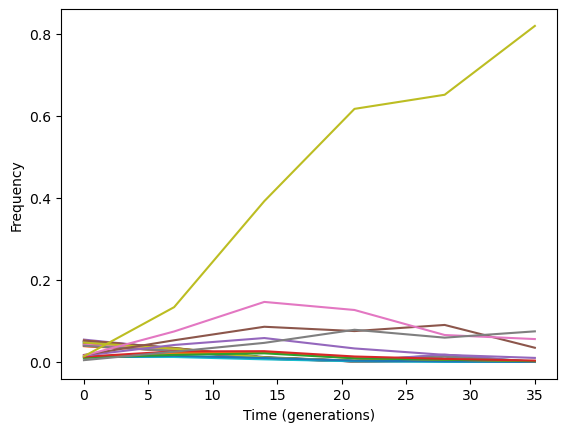

In [13]:
# Test marker for consistency
population = "pop1"
environment = "gluL"
replicate = 2
r = population + "_" + environment + str(replicate)
raw.format_data(population, environment, 3)

data, time, ordered_counts = io.load_data("LTEE_" + r + ".csv", return_ordered = False, delimiter=",")
print(ordered_counts.astype("int"))
barcodes = data["BC"].tolist()
print(type(time))

ordered_frequencies = ordered_counts / np.sum(ordered_counts, axis = 0)

plt.plot([0,7,14,21,28,35], ordered_frequencies.T)
plt.xlabel('Time (generations)')
plt.ylabel('Frequency')
plt.show()

In [3]:
fitness_model = m.Fitness_Model(ordered_counts, time, s_ref = 1, prior="flat")
fitness_model.find_MAP()

C:\Users\jedwa\anaconda3\envs\Fitness_code\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in true_divide
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


<class 'numpy.ndarray'>
[[1.00583769]
 [1.06558297]
 [1.00665163]
 [1.06552136]
 [1.01054562]
 [1.00753576]
 [1.00528656]
 [1.00590203]
 [0.99975202]
 [1.01002333]
 [1.00293089]
 [1.01160418]
 [1.00227407]
 [1.00141821]
 [1.00748542]
 [1.01188946]
 [1.06490288]
 [1.00894841]
 [1.01173586]
 [1.0577901 ]
 [1.11170368]
 [1.11535506]
 [1.11962725]
 [1.14419285]
 [1.18923563]
 [1.18487415]
 [1.23137757]
 [1.25645934]]
[0.03985157 0.03778834 0.04463297 0.03828651 0.04773062 0.04991476
 0.04850402 0.0412024  0.0468799  0.04832863 0.04538192 0.05024521
 0.04405188 0.04258387 0.04691148 0.05066612 0.0412337  0.03514631
 0.04599811 0.012621   0.01136463 0.01172437 0.01048102 0.01351856
 0.01786506 0.01860179 0.02427645 0.00579411 0.0284147 ]


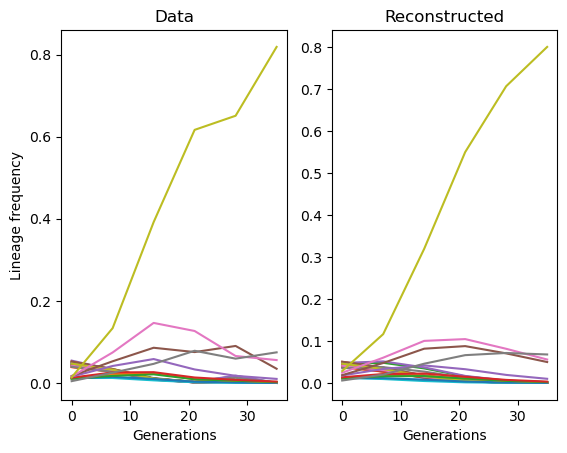

In [14]:
bc = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,500,1000,1500,2000,5000,10000,15000,30000,40000,50000]
fitness_model.save_MAP("test_out.csv", bc)
raw_s = fitness_model.map_estimate["s"]
print(type(raw_s))
vals_f0 = fitness_model.map_estimate["f0"]
vals_s = np.zeros((29))
vals_s[0] = 0
for i in range(0, len(raw_s)):
    vals_s[i + 1] = raw_s[i]
vals_data = fitness_model.data
print(raw_s)
print(vals_f0)
fitness_model.plot_MAP_estimate(type = "lin", filename="LTEE_" + r + "_freq.png")

In [5]:
out = open("Fitness_" + r + ".csv", "w")
header = "BC,0,7,14,21,28,35,s,f0"
bc = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,500,1000,1500,2000,5000,10000,15000,30000,40000,50000]
out.write(header)
out.write("\n")
for l in range(0, len(vals_s)):
    holder = str(bc[l])
    for h in range(0, 6):
        holder += ',' + str(vals_data[l][h])
    holder += ',' + str(vals_s[l]) + ',' + str(vals_f0[l])
    out.write(holder)
    out.write("\n")
out.close()

In [6]:
traj = m.create_trajectories(vals_f0, vals_s, time)
err_data = m.sample_lineages(traj, 100000)
print(err_data)

[[ 3989     3     0     0     0     0]
 [ 3738  2812  1355   400    67    23]
 [ 4485  4851  3431  1514   540   158]
 [ 3924  2825  1243   367    91    14]
 [ 4775  5355  3665  1681   566   187]
 [ 5062  3739  1812   602   131    29]
 [ 4791  3583  1709   494   106    24]
 [ 4144  3003  1409   365    74    23]
 [ 4750  3556  1656   485   105    17]
 [ 4854  3310  1512   431    86    11]
 [ 4561  3342  1628   523   125    22]
 [ 5059  3604  1666   500   110    17]
 [ 4491  3254  1671   523   106    20]
 [ 4441  2933  1418   406    79    15]
 [ 4591  3335  1476   400    95    18]
 [ 5066  3752  1820   560   112    13]
 [ 4131  3010  1437   438    97    20]
 [ 3445  3874  2875  1245   371   118]
 [ 4622  3348  1557   472   115    14]
 [ 1263   967   474   143    30     7]
 [ 1187  1175   759   345    99    21]
 [ 1176  1828  1740  1063   516   206]
 [ 1054  1640  1662  1012   505   232]
 [ 1314  2124  2234  1503   710   286]
 [ 1729  3343  4290  3312  1916   999]
 [ 1825  4877  8220  8774

In [7]:
out = open("C:\\Users\\jedwa\\Documents\\Desai_Lab\\LTEE\\Fitness_code\\fitness_mcmc\\fitness_mcmc\\experimental_data\\Sim_counts_" + r + ".csv", "w")
header = "BC,0,7,14,21,28,35"
bc = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,500,1000,1500,2000,5000,10000,15000,30000,40000,50000]
out.write(header)
out.write("\n")
for l in range(0, len(vals_s)):
    holder = str(bc[l])
    for h in range(0, 6):
        holder += ',' + str(err_data[l][h])
    out.write(holder)
    out.write("\n")
out.close()

[[ 3989     3     0     0     0     0]
 [ 3738  2812  1355   400    67    23]
 [ 4485  4851  3431  1514   540   158]
 [ 3924  2825  1243   367    91    14]
 [ 4775  5355  3665  1681   566   187]
 [ 5062  3739  1812   602   131    29]
 [ 4791  3583  1709   494   106    24]
 [ 4144  3003  1409   365    74    23]
 [ 4750  3556  1656   485   105    17]
 [ 4854  3310  1512   431    86    11]
 [ 4561  3342  1628   523   125    22]
 [ 5059  3604  1666   500   110    17]
 [ 4491  3254  1671   523   106    20]
 [ 4441  2933  1418   406    79    15]
 [ 4591  3335  1476   400    95    18]
 [ 5066  3752  1820   560   112    13]
 [ 4131  3010  1437   438    97    20]
 [ 3445  3874  2875  1245   371   118]
 [ 4622  3348  1557   472   115    14]
 [ 1263   967   474   143    30     7]
 [ 1187  1175   759   345    99    21]
 [ 1176  1828  1740  1063   516   206]
 [ 1054  1640  1662  1012   505   232]
 [ 1314  2124  2234  1503   710   286]
 [ 1729  3343  4290  3312  1916   999]
 [ 1825  4877  8220  8774

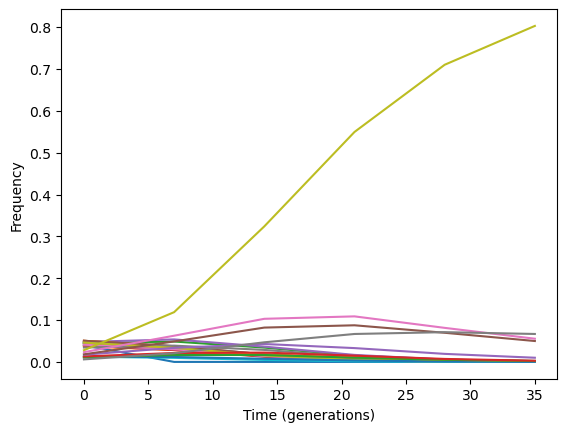

In [8]:
data, time, err_counts = io.load_data("Sim_counts_" + r + ".csv", return_ordered = False, delimiter=",")
print(err_counts.astype("int"))
print(data)

err_frequencies = err_counts / np.sum(err_counts, axis = 0)

plt.plot([0,7,14,21,28,35], err_frequencies.T)
plt.xlabel('Time (generations)')
plt.ylabel('Frequency')
plt.show()

In [9]:
err_model = m.Fitness_Model(err_counts, time, s_ref = 0, prior="flat")
err_model.find_MAP()

C:\Users\jedwa\anaconda3\envs\Fitness_code\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in true_divide
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


In [10]:
#err_model.plot_MAP_estimate(type = "lin", filename="Error_" + r + "_freq.png")
e_raw_s = err_model.map_estimate["s"]
e_vals_f0 = err_model.map_estimate["f0"]
e_vals_s = np.zeros((29))
e_vals_s[0] = 0
for i in range(0, len(e_raw_s)):
    e_vals_s[i + 1] = e_raw_s[i]
e_vals_data = err_model.data

In [11]:
out = open("FitnessError_" + r + ".csv", "w")
header = "BC,s,f0,s_err,f0_err"
bc = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,500,1000,1500,2000,5000,10000,15000,30000,40000,50000]
out.write(header)
out.write("\n")
for l in range(0, len(e_vals_s)):
    holder = str(bc[l])
    holder += ',' + str(vals_s[l]) + ',' + str(vals_f0[l]) + ',' + str(e_vals_s[l]) + ',' + str(e_vals_f0[l])
    out.write(holder)
    out.write("\n")
out.close()